# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

API_Challenge: Weather Py
--
Developed by: Henry Greyner
    
    Observations:
        1. There is a strong correlation between a the conuntries that reside in the northern hemisphere when compared to their max temperature. The same can not be said for the southern hemisphere, althoug it would be interesting to see if this observation changes with a different sample.
        
        2. The variance in the data for Cloudiness is high when compared with the cities latitude, and from the plots it can be noticed that there is no correlation between the two measurements.
        
        3. There is no correlation between the Wind Speed and the cities latitude.
        

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#verify the city list
cities

['port alfred',
 'hirna',
 'norman wells',
 'kaitangata',
 'thompson',
 'mataura',
 'saint-philippe',
 'christchurch',
 'hermanus',
 'yar-sale',
 'tabory',
 'punta arenas',
 'marcona',
 'hilo',
 'dingle',
 'kuytun',
 'jamestown',
 'ushuaia',
 'bredasdorp',
 'tsihombe',
 'hobart',
 'plettenberg bay',
 'kearney',
 'saldanha',
 'fairbanks',
 'busselton',
 'homer',
 'victoria',
 'tasiilaq',
 'kuche',
 'cabo san lucas',
 'sao geraldo do araguaia',
 'attawapiskat',
 'iqaluit',
 'kargil',
 'portree',
 'porto santo',
 'bethel',
 'ocampo',
 'illoqqortoormiut',
 'mapimi',
 'butaritari',
 'sao filipe',
 'narsaq',
 'southbridge',
 'maniitsoq',
 'batagay-alyta',
 'curitibanos',
 'kavaratti',
 'dikson',
 'taolanaro',
 'kyra',
 'cape town',
 'cayenne',
 'carnarvon',
 'minuwangoda',
 'albany',
 'severo-kurilsk',
 'avarua',
 'kodinsk',
 'qaanaaq',
 'samusu',
 'erenhot',
 'sal rei',
 'leningradskiy',
 'muroto',
 'tigil',
 'puerto ayora',
 'atuona',
 'manggar',
 'verkhnetulomskiy',
 'labutta',
 'moroni',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#setup of base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#setup of query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#empty containers for collecting the data
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
city_number=1

In [7]:
#setup for API calls
print("Beginning Data Retrieval")
print("-----------------------------")
#for loop used together with try/except to obtain responses from API and skip cities not found in search 
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        City_ID.append(response['id'])
        City.append(response["name"])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        city_number_name=response["name"]
        print(f"Processing Record {city_number} - {city_number_name}")
        
        #counter to record the number of cities found in API
        city_number= city_number + 1
        
        #delay to complay with API documentation requirements
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping..")
    pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 - Port Alfred
Processing Record 2 - Hirna
Processing Record 3 - Norman Wells
Processing Record 4 - Kaitangata
Processing Record 5 - Thompson
Processing Record 6 - Mataura
Processing Record 7 - Saint-Philippe
Processing Record 8 - Christchurch
Processing Record 9 - Hermanus
Processing Record 10 - Yar-Sale
Processing Record 11 - Tabory
Processing Record 12 - Punta Arenas
City not found. Skipping..
Processing Record 13 - Hilo
Processing Record 14 - Dingle
Processing Record 15 - Kuytun
Processing Record 16 - Jamestown
Processing Record 17 - Ushuaia
Processing Record 18 - Bredasdorp
City not found. Skipping..
Processing Record 19 - Hobart
Processing Record 20 - Plettenberg Bay
Processing Record 21 - Kearney
Processing Record 22 - Saldanha
Processing Record 23 - Fairbanks
Processing Record 24 - Busselton
Processing Record 25 - Homer
Processing Record 26 - Hong Kong
Processing Record 27 - Tasiilaq
City not found. Skipp

Processing Record 235 - East London
Processing Record 236 - Russell
Processing Record 237 - Dillon
Processing Record 238 - Tilichiki
Processing Record 239 - Dera Bugti
Processing Record 240 - Alamosa
Processing Record 241 - Cabedelo
Processing Record 242 - Tuatapere
Processing Record 243 - Marrakesh
Processing Record 244 - Banjar
City not found. Skipping..
Processing Record 245 - Hobyo
Processing Record 246 - Panaba
Processing Record 247 - Gujranwala
Processing Record 248 - Kavieng
City not found. Skipping..
Processing Record 249 - Vapi
Processing Record 250 - Khuldabad
Processing Record 251 - Talnakh
Processing Record 252 - Kralendijk
Processing Record 253 - Kuzedeyevo
City not found. Skipping..
Processing Record 254 - Juneau
Processing Record 255 - Laas
City not found. Skipping..
Processing Record 256 - Alofi
Processing Record 257 - Polignano a Mare
City not found. Skipping..
Processing Record 258 - New Port Richey
Processing Record 259 - Kalevala
Processing Record 260 - Saint-August

Processing Record 463 - Santa Isabel do Rio Negro
Processing Record 464 - Piacabucu
City not found. Skipping..
Processing Record 465 - Khovd
Processing Record 466 - Praia
Processing Record 467 - Nizhniy Kuranakh
Processing Record 468 - Mubende
Processing Record 469 - Nouadhibou
Processing Record 470 - Huanuni
Processing Record 471 - Candido Mendes
City not found. Skipping..
Processing Record 472 - Flinders
Processing Record 473 - Songjianghe
Processing Record 474 - Leeton
Processing Record 475 - Soyo
Processing Record 476 - Los Llanos de Aridane
Processing Record 477 - Saint-Francois
Processing Record 478 - Mayo
Processing Record 479 - Usinsk
Processing Record 480 - Goundi
Processing Record 481 - Kytmanovo
Processing Record 482 - Dubovskoye
Processing Record 483 - Barra do Corda
Processing Record 484 - Tura
Processing Record 485 - Clovis
Processing Record 486 - Hannibal
Processing Record 487 - Buraidah
Processing Record 488 - Peleduy
Processing Record 489 - Baiyin
Processing Record 490

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#setup of dictionary to stablish a dataframe
weather_data={
    "City ID": City_ID,
    "City":City,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Wind Speed":Wind_Speed
}

#dataframe to visualize data
weather_df=pd.DataFrame(weather_data)
weather_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,964432,Port Alfred,0,ZA,1579998130,98,-33.59,26.89,18.89,2.68
1,334700,Hirna,100,ET,1579998130,90,9.22,41.10,15.34,4.11
2,6089245,Norman Wells,40,CA,1579998130,63,65.28,-126.83,-24.00,6.20
3,2208248,Kaitangata,66,NZ,1579998130,69,-46.28,169.85,19.44,4.72
4,6165406,Thompson,90,CA,1579998092,92,55.74,-97.86,-9.00,1.65
...,...,...,...,...,...,...,...,...,...,...
1684,3527113,Hidalgotitlan,5,MX,1579999187,78,17.78,-94.63,25.00,2.69
1685,933416,Manyana,45,BW,1579999236,53,-23.40,21.72,22.38,3.90
1686,539817,Kudymkar,100,RU,1579999237,94,59.02,54.66,-9.57,2.10
1687,2038421,Bayan,0,CN,1579999238,91,46.08,127.40,-20.80,2.04


In [37]:
#sorting of values to make sure that no value is repeated
weather_df.sort_values("City ID", inplace = True)
#droping any values that may be duplicated
weather_df.drop_duplicates(subset ="City",keep = "first", inplace = True)

In [38]:
#verifying the number of cities comply with assigment and all columns have the same amount of values
weather_df.count()

City ID       562
City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [39]:
#export data to CSV file to use in next assigment
weather_df.to_csv(output_data_file, index=True, header=True)

In [40]:
#verify dataset
weather_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1370,57000,Hobyo,99,SO,1579998870,81,5.35,48.53,25.45,7.09
1113,58933,Garoowe,74,SO,1579998212,76,8.41,48.48,22.88,4.91
908,81604,Suluq,67,LY,1579998180,61,31.67,20.25,10.89,4.63
557,86049,Jalu,12,LY,1579998214,52,29.03,21.55,11.71,3.88
177,87205,Darnah,48,LY,1579998154,59,32.77,22.64,15.54,5.66
...,...,...,...,...,...,...,...,...,...,...
917,6690296,Saint-Joseph,75,RE,1579997913,78,-21.37,55.62,23.00,3.60
1374,7279741,Vapi,0,IN,1579998875,33,20.37,72.90,19.12,1.62
1055,7601762,Bairiki Village,20,KI,1579998203,74,1.33,172.98,31.00,3.10
1158,8010683,Porto Santo,20,PT,1579998135,77,33.07,-16.34,16.00,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

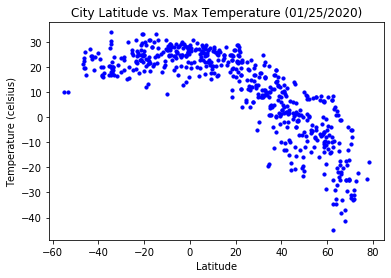

In [120]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (celsius)")

plt.savefig("output_data/City Latitude vs. Max Temperature.png")

In [128]:
#Scatter plot to analyze if there is any apparent relationship between the cities latitudes and their max temperature

#### Latitude vs. Humidity Plot

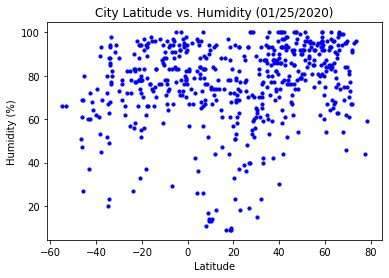

In [121]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/City Latitude vs. Humidity.png")

In [127]:
#Scatter plot to analyze if there is any apparent relationship between the cities latitudes and their humidity

#### Latitude vs. Cloudiness Plot

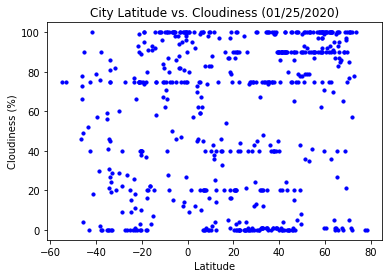

In [122]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/City Latitude vs. Cloudiness.png")

In [126]:
#Scatter plot to analyze if there is any apparent relationship between the cities latitudes and their cloudiness

#### Latitude vs. Wind Speed Plot

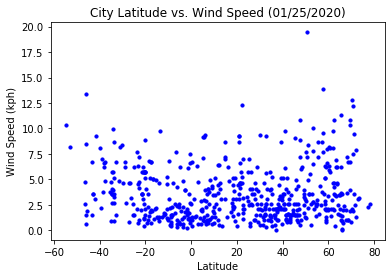

In [123]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")

plt.savefig("output_data/City Latitude vs. Wind Speed.png")

In [125]:
#Scatter plot to analyze if there is any apparent relationship between the cities latitudes and their wind speed

## Linear Regression

In [85]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames

#creating a mask to create new columns with positive latitudes and negative latitudes
weather_df['Positives Lat']=weather_df.Lat.where(weather_df.Lat>0,0)
weather_df['Negatives Lat']=weather_df.Lat.where(weather_df.Lat<0,0)
mask = weather_df['Positives Lat'] > 0
#new dataset with split latitudes
weather_df_n = weather_df[mask]
weather_df_s = weather_df[~mask]

weather_df_n

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Positives Lat,Negatives Lat
1370,57000,Hobyo,99,SO,1579998870,81,5.35,48.53,25.45,7.09,5.35,0.0
1113,58933,Garoowe,74,SO,1579998212,76,8.41,48.48,22.88,4.91,8.41,0.0
908,81604,Suluq,67,LY,1579998180,61,31.67,20.25,10.89,4.63,31.67,0.0
557,86049,Jalu,12,LY,1579998214,52,29.03,21.55,11.71,3.88,29.03,0.0
177,87205,Darnah,48,LY,1579998154,59,32.77,22.64,15.54,5.66,32.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1382,6537556,Polignano a Mare,90,IT,1579998884,100,41.00,17.22,12.78,2.10,41.00,0.0
427,6539309,Sinnai,90,IT,1579998193,100,39.30,9.20,12.00,2.10,39.30,0.0
1374,7279741,Vapi,0,IN,1579998875,33,20.37,72.90,19.12,1.62,20.37,0.0
1055,7601762,Bairiki Village,20,KI,1579998203,74,1.33,172.98,31.00,3.10,1.33,0.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.852


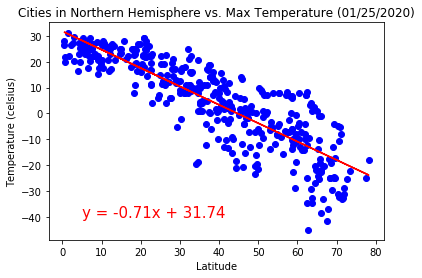

In [129]:
#scatter plot
plt.scatter(weather_df_n["Positives Lat"],weather_df_n["Max Temp"], marker="o", color="blue")

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Northern Hemisphere vs. Max Temperature ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (celsius)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_n["Positives Lat"], weather_df_n["Max Temp"])
regress_values = weather_df_n["Positives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_n["Positives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Northern cities vs. Max Temperature.png")

In [130]:
#Scatter plot showing a correlation between the northern hemisphere cities vs their max temperature. As latitue increases temperature decreses

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.349


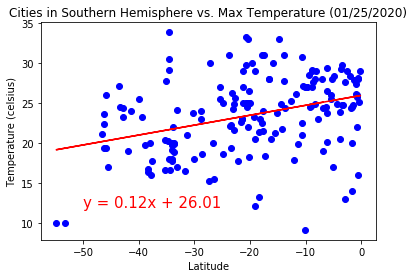

In [131]:
#scatter plot
plt.scatter(weather_df_s["Negatives Lat"],weather_df_s["Max Temp"], marker="o", color="blue")

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Southern Hemisphere vs. Max Temperature ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (celsius)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_s["Negatives Lat"], weather_df_s["Max Temp"])
regress_values = weather_df_s["Negatives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_s["Negatives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Southern cities vs. max temp.png")

In [132]:
#Scatter plot showing no correlation between the southern hemisphere cities vs their max temperature. Probably because of small sample size.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.336


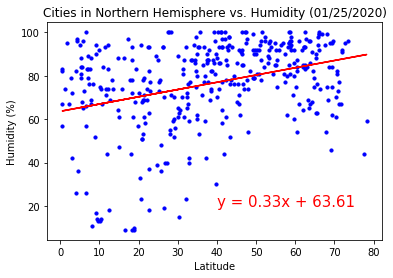

In [133]:
#scatter plot
plt.scatter(weather_df_n["Positives Lat"],weather_df_n["Humidity"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Northern Hemisphere vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_n["Positives Lat"], weather_df_n["Humidity"])
regress_values = weather_df_n["Positives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_n["Positives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Northern cities vs. Humidity.png")

In [134]:
#Scatter plot showing no correlation between the northern hemisphere cities vs their humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.407


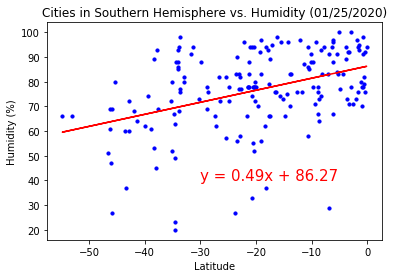

In [135]:
#scatter plot
plt.scatter(weather_df_s["Negatives Lat"],weather_df_s["Humidity"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Southern Hemisphere vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_s["Negatives Lat"], weather_df_s["Humidity"])
regress_values = weather_df_s["Negatives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_s["Negatives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Southern cities vs. humidity.png")

In [136]:
#Scatter plot showing a slight correlation between the southern hemisphere cities vs their humidity. This could different with a different sample.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27


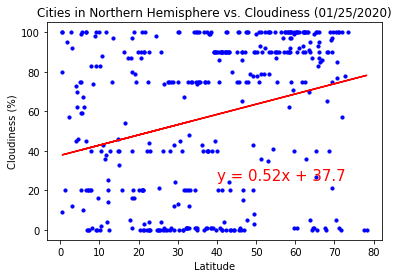

In [137]:
#scatter plot
plt.scatter(weather_df_n["Positives Lat"],weather_df_n["Cloudiness"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Northern Hemisphere vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_n["Positives Lat"], weather_df_n["Cloudiness"])
regress_values = weather_df_n["Positives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_n["Positives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Northern cities vs. Cloudiness.png")

In [138]:
#Scatter plot showing no correlation between the northern hemisphere cities vs their cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.388


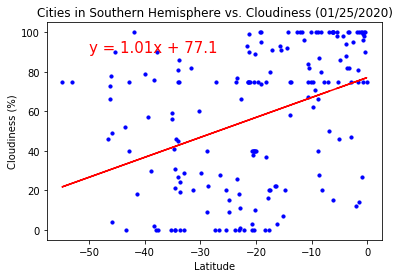

In [139]:
#scatter plot
plt.scatter(weather_df_s["Negatives Lat"],weather_df_s["Cloudiness"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Southern Hemisphere vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_s["Negatives Lat"], weather_df_s["Cloudiness"])
regress_values = weather_df_s["Negatives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_s["Negatives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Southern cities vs. cloudiness.png")

In [140]:
#Scatter plot showing no correlation between the southern hemisphere cities vs their cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.152


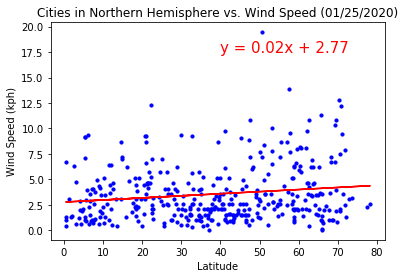

In [141]:
#scatter plot
plt.scatter(weather_df_n["Positives Lat"],weather_df_n["Wind Speed"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Northern Hemisphere vs. Wind Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_n["Positives Lat"], weather_df_n["Wind Speed"])
regress_values = weather_df_n["Positives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_n["Positives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(40,17.5),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Northern cities vs. wind speed.png")

In [142]:
#Scatter plot showing no correlation between the northern hemisphere cities vs their wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.413


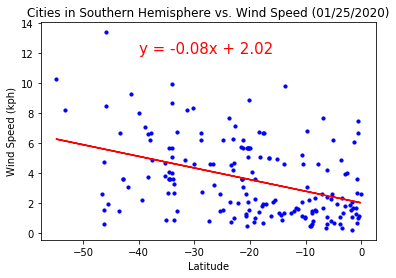

In [143]:
#scatter plot
plt.scatter(weather_df_s["Negatives Lat"],weather_df_s["Wind Speed"], marker="o", color="blue", s=10)

#scatter plot labels
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"Cities in Southern Hemisphere vs. Wind Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")

#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_s["Negatives Lat"], weather_df_s["Wind Speed"])
regress_values = weather_df_s["Negatives Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Line plot with linear regression
plt.plot(weather_df_s["Negatives Lat"],regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")

plt.savefig("output_data/Southern cities vs. wind speed.png")

In [144]:
#Scatter plot showing no correlation between the southern hemisphere cities vs their wind speed.